In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

Initialize hikyuu_2.6.6_202508081714_RELEASE_macosx_arm64 ...
2025-08-09 00:44:02.961 [HKU-I] - current python version: 3.12.7 (main.cpp:68)


2025-08-09 00:44:03,471 [INFO] runing in interactive session [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:109) [hikyuu::hku_info]
2025-08-09 00:44:03,472 [INFO] running in jupyter [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:116) [hikyuu::hku_info]


current plugin path: /Users/fasiondog/.hikyuu/plugin
2025-08-09 00:44:03.910 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-08-09 00:44:03.912 [HKU-I] - 加载市场信息…… (StockManager.cpp:576)
2025-08-09 00:44:03.913 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:594)
2025-08-09 00:44:03.914 [HKU-I] - 加载证券信息…… (StockManager.cpp:480)
2025-08-09 00:44:03.979 [HKU-I] - 加载权息数据…… (StockManager.cpp:612)
2025-08-09 00:44:04.116 [HKU-I] - 加载板块信息…… (StockManager.cpp:185)
2025-08-09 00:44:04.315 [HKU-I] - 加载K线数据…… (StockManager.cpp:189)
2025-08-09 00:44:04.315 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:233)
2025-08-09 00:44:04.315 [HKU-I] - 0.40 秒数据加载完毕. (StockManager.cpp:195)
2025-08-09 00:44:04.316 [HKU-I] - 启动行情接收. (SpotAgent.cpp:38)
CPU times: user 542 ms, sys: 136 ms, total: 678 ms
Wall time: 1.47 s


In [2]:
# 创建一个系统策略
# my_mm = MM_FixedCount(100)
my_mm = MM_Nothing()
my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [3]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)

In [4]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [5]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [6]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500), 10)

CPU times: user 2.95 s, sys: 1.23 s, total: 4.18 s
Wall time: 3.49 s


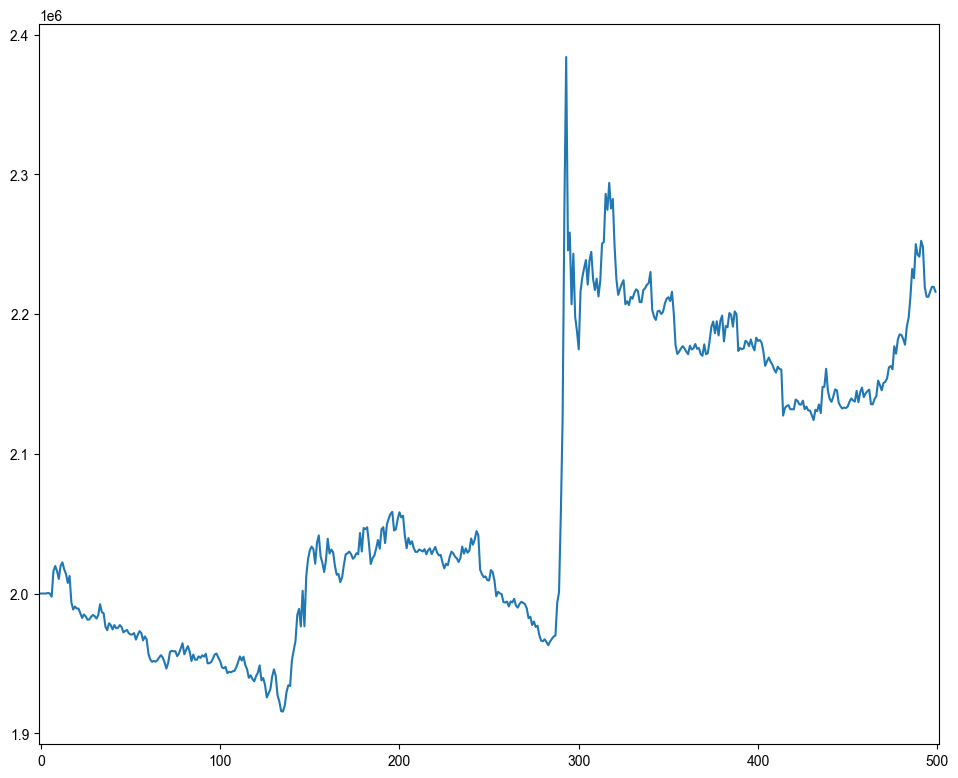

In [7]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

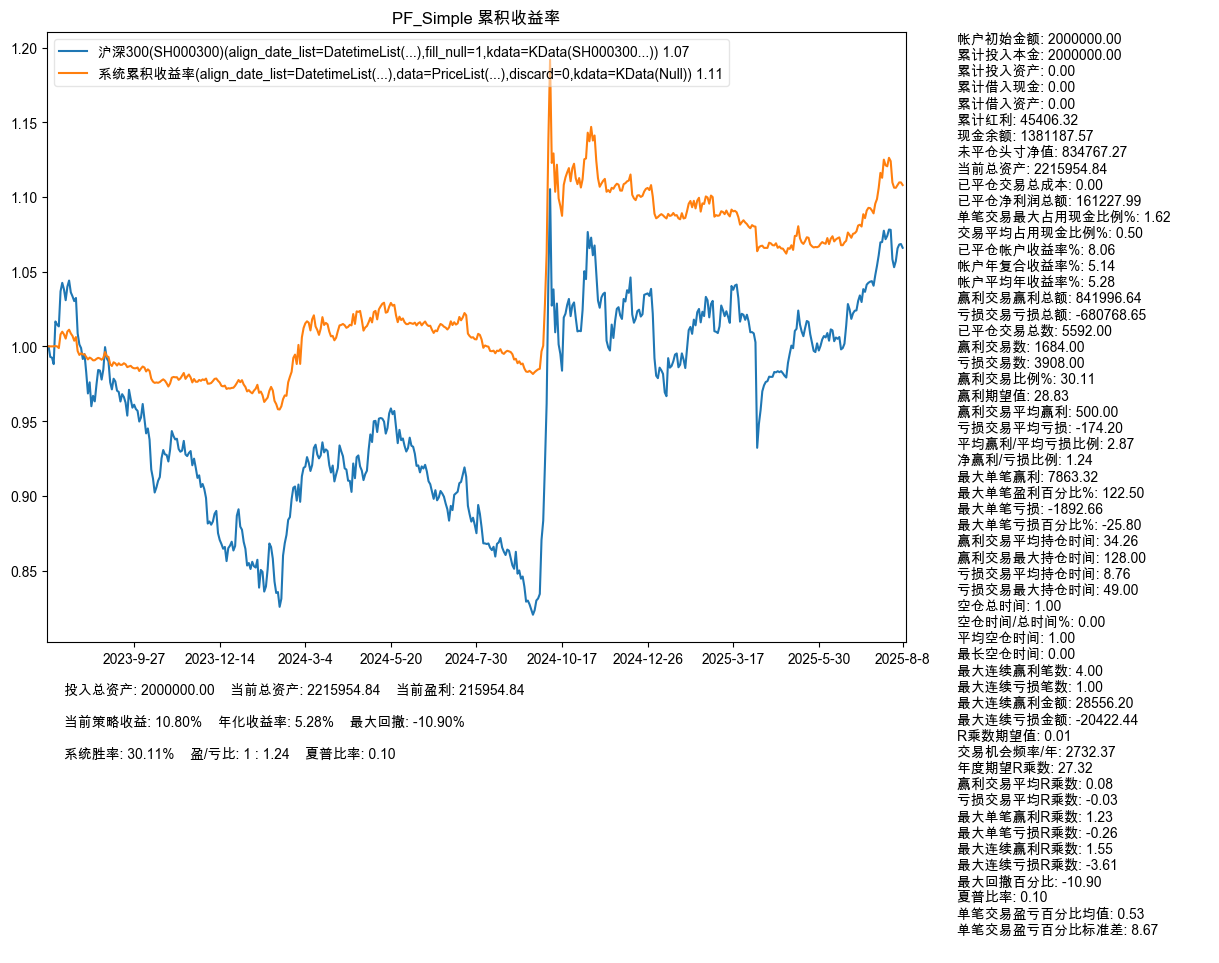

In [8]:
my_pf.performance()

In [9]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2001-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2023-07-24 00:00:00,
  lastDatetime: 2025-08-08 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2215954.84,
  current cash: 1381187.57,
  current market_value: 834767.27,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SZ002304 洋河股份 2025-07-11 00:00:00 21 100.00 6616.00 6879.00 263.00 3.98% 0.01%
    SZ002311 海大集团 2025-08-04 00:00:00 5 100.00 5721.00 5755.00 34.00 0.59% 0.00%
    SZ002466 天齐锂业 2025-06-25 00:00:00 33 200.00 6230.00 8166.00 1936.00 31.08% 0.10%
    SZ002736 国信证券 2025-06-26 00:00:00 32 600.00 7164.00 8172.00 1008.00 14.07% 0.05%
    SZ002938 鹏鼎控股 2025-06-06 00:00:00 46 200.00 5750.00 10022.00

In [10]:
my_tm.get_position_list().to_df()

,证券代码,证券名称,买入时间,持仓天数,持仓数量,投入金额,当前市值,盈亏金额,盈亏百分比,止损价,目标价,清仓时间,累计持有数量,累计成本,累计风险,累计买入金额,累计卖出金额
0,SZ002304,洋河股份,2025-07-11,29,100.0,6616.0,6879.0,263.0,3.98,0.0,NaN,NaT,100.0,0.0,6616.0,6616.0,0.0
1,SZ002311,海大集团,2025-08-04,5,100.0,5721.0,5755.0,34.0,0.59,0.0,NaN,NaT,100.0,0.0,5721.0,5721.0,0.0
2,SZ002466,天齐锂业,2025-06-25,45,200.0,6230.0,8166.0,1936.0,31.08,0.0,NaN,NaT,200.0,0.0,6230.0,6230.0,0.0
3,SZ002736,国信证券,2025-06-26,44,600.0,7164.0,8172.0,1008.0,14.07,0.0,NaN,NaT,600.0,0.0,7164.0,7164.0,0.0
4,SZ002938,鹏鼎控股,2025-06-06,64,200.0,5750.0,10022.0,4272.0,74.30,0.0,NaN,NaT,200.0,0.0,5950.0,5950.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SZ002230,科大讯飞,2025-07-17,23,100.0,4708.0,4822.0,114.0,2.42,0.0,NaN,NaT,100.0,0.0,4708.0,4708.0,0.0
120,SZ002236,大华股份,2025-06-25,45,400.0,6252.0,6551.6,299.6,4.79,0.0,NaN,NaT,400.0,0.0,6252.0,6252.0,0.0
121,SZ002415,海康威视,2025-07-11,29,200.0,5558.0,5754.0,196.0,3.53,0.0,NaN,NaT,200.0,0.0,5558.0,5558.0,0.0
122,SZ002422,科伦药业,2025-07-21,19,200.0,7036.0,7322.0,286.0,4.06,0.0,NaN,NaT,200.0,0.0,7036.0,7036.0,0.0


In [11]:
my_tm.get_trade_list().to_df()

,证券代码,证券名称,交易时间,业务名称,计划交易价格,实际成交价格,目标价格,交易数量,止损价,现金余额,交易总成本,佣金,印花税,过户费,其它成本,信号来源,备注
0,,,2001-01-01,INIT,2000000.00,2000000.00,0.0,0.0,0.0,2000000.00,0.0,0.0,0.0,0.0,0.0,--,
1,SH601111,中国国航,2023-07-24,BUY,8.71,8.71,NaN,700.0,0.0,1993903.00,0.0,0.0,0.0,0.0,0.0,SG,
2,SZ300122,智飞生物,2023-07-24,BUY,46.48,46.48,NaN,100.0,0.0,1989255.00,0.0,0.0,0.0,0.0,0.0,SG,
3,SZ300408,三环集团,2023-07-24,BUY,31.97,31.97,NaN,200.0,0.0,1982861.00,0.0,0.0,0.0,0.0,0.0,SG,
4,SZ300832,新产业,2023-07-24,BUY,61.91,61.91,NaN,100.0,0.0,1976670.00,0.0,0.0,0.0,0.0,0.0,SG,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,SZ002463,沪电股份,2025-08-08,SELL,51.01,51.01,NaN,200.0,0.0,1388338.67,0.0,0.0,0.0,0.0,0.0,SG,
12542,SH600219,南山铝业,2025-08-08,BUY,4.05,4.05,NaN,1800.0,0.0,1381048.67,0.0,0.0,0.0,0.0,0.0,SG,
12543,SH600018,上港集团,2025-08-08,BUY,5.75,5.75,NaN,1200.0,0.0,1374148.67,0.0,0.0,0.0,0.0,0.0,SG,
12544,SH601669,中国电建,2025-08-08,SELL,6.32,6.32,NaN,1100.0,0.0,1381100.67,0.0,0.0,0.0,0.0,0.0,SG,
